In [1]:
import numpy as np 
import pandas as pd
import seaborn as sb 
from sklearn.model_selection import train_test_split 
from sklearn.neural_network import MLPRegressor


df = pd.read_csv('data_clean.csv')
df.head(10)

,temp_Celsius,time_dayofweek,time_year,time_month,time_dayofmonth,time_hour,rain_1h,snow_1h,clouds_all,traffic_volume
0,15.13,1,2012,10,2,9,0.0,0.0,40,5545
1,16.21,1,2012,10,2,10,0.0,0.0,75,4516
2,16.43,1,2012,10,2,11,0.0,0.0,90,4767
3,16.98,1,2012,10,2,12,0.0,0.0,90,5026
4,17.99,1,2012,10,2,13,0.0,0.0,75,4918
5,18.57,1,2012,10,2,14,0.0,0.0,1,5181
6,20.02,1,2012,10,2,15,0.0,0.0,1,5584
7,20.71,1,2012,10,2,16,0.0,0.0,1,6015
8,20.99,1,2012,10,2,17,0.0,0.0,20,5791
9,19.95,1,2012,10,2,18,0.0,0.0,20,4770


In [2]:
df=df.drop(['time_year','time_month','time_dayofmonth'],axis=1)
df.head(10)

,temp_Celsius,time_dayofweek,time_hour,rain_1h,snow_1h,clouds_all,traffic_volume
0,15.13,1,9,0.0,0.0,40,5545
1,16.21,1,10,0.0,0.0,75,4516
2,16.43,1,11,0.0,0.0,90,4767
3,16.98,1,12,0.0,0.0,90,5026
4,17.99,1,13,0.0,0.0,75,4918
5,18.57,1,14,0.0,0.0,1,5181
6,20.02,1,15,0.0,0.0,1,5584
7,20.71,1,16,0.0,0.0,1,6015
8,20.99,1,17,0.0,0.0,20,5791
9,19.95,1,18,0.0,0.0,20,4770


In [3]:
data=np.array(df)
x=data[:,:6]
y=data[:,-1]
print(np.shape(y))
print(x)
print("_________")
print(y)

(48194,)
[[15.13  1.    9.    0.    0.   40.  ]
 [16.21  1.   10.    0.    0.   75.  ]
 [16.43  1.   11.    0.    0.   90.  ]
 ...
 [ 9.58  6.   21.    0.    0.   90.  ]
 [ 8.94  6.   22.    0.    0.   90.  ]
 [ 8.97  6.   23.    0.    0.   90.  ]]
_________
[5545. 4516. 4767. ... 2159. 1450.  954.]


In [4]:
X_train, X_val, y_train, y_val=train_test_split(x,y,train_size=0.6,random_state=2)
print('the X_train dataset shape is {}' , np.shape(X_train))
print('the y_train dataset shape is {}' ,np.shape(y_train))
print('the  X_val dataset shape is {}' ,np.shape(X_val))
print('the y_val dataset shape is {}' ,np.shape(y_val))

the X_train dataset shape is {} (28916, 6)
the y_train dataset shape is {} (28916,)
the  X_val dataset shape is {} (19278, 6)
the y_val dataset shape is {} (19278,)


In [5]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5
count,28916.000000,28916.000000,28916.000000,28916.000000,28916.000000,28916.000000
mean,8.115946,2.980599,11.425197,0.473912,0.000213,49.524727
std,12.701347,1.998427,6.943584,57.823690,0.008219,39.010924
min,-29.530000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.940000,1.000000,5.000000,0.000000,0.000000,1.000000
50%,9.230000,3.000000,11.000000,0.000000,0.000000,64.000000
75%,18.657000,5.000000,17.000000,0.000000,0.000000,90.000000
max,36.920000,6.000000,23.000000,9831.300000,0.510000,100.000000


In [6]:
pd.DataFrame(X_val).describe()

,0,1,2,3,4,5
count,19278.000000,19278.000000,19278.000000,19278.000000,19278.000000,19278.000000
mean,8.111629,2.990404,11.360878,0.124973,0.000237,49.144102
std,12.722266,2.016959,6.935441,0.950635,0.008092,39.016806
min,-29.760000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.000000,1.000000,5.000000,0.000000,0.000000,1.000000
50%,9.430000,3.000000,11.000000,0.000000,0.000000,64.000000
75%,18.660000,5.000000,17.000000,0.000000,0.000000,90.000000
max,36.140000,6.000000,23.000000,44.450000,0.510000,100.000000


In [7]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
pd.DataFrame(X_train).describe()
pd.DataFrame(X_val).describe()

,0,1,2,3,4,5
count,19278.000000,19278.000000,19278.000000,19278.000000,19278.000000,19278.000000
mean,0.566465,0.498401,0.493951,0.000013,0.000465,0.491441
std,0.191456,0.336160,0.301541,0.000097,0.015868,0.390168
min,-0.003461,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.429345,0.166667,0.217391,0.000000,0.000000,0.010000
50%,0.586305,0.500000,0.478261,0.000000,0.000000,0.640000
75%,0.725207,0.833333,0.739130,0.000000,0.000000,0.900000
max,0.988262,1.000000,1.000000,0.004521,1.000000,1.000000


In [8]:
from sklearn.neural_network import MLPRegressor
NN = MLPRegressor(hidden_layer_sizes =(50,50,), 
                  activation = 'relu', 
                  solver='lbfgs', 
                  alpha=0.0001 ,
                  learning_rate='adaptive',
                  early_stopping= False,
                  max_iter = 10000)
NN.fit(X_train, y_train )

/Users/macbookair/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(hidden_layer_sizes=(50, 50), learning_rate='adaptive',
             max_iter=10000, solver='lbfgs')

In [9]:
from sklearn import metrics

mae=metrics.mean_absolute_error(y_train, NN.predict(X_train))
mse=metrics.mean_squared_error(y_train, NN.predict(X_train))
rsq=metrics.r2_score(y_train, NN.predict(X_train))


In [10]:
print(mae,mse,rsq)

291.49828041249435 252014.09873644018 0.935874170693187


In [11]:
mae=metrics.mean_absolute_error(y_val, NN.predict(X_val))
mse=metrics.mean_squared_error(y_val, NN.predict(X_val))
rsq=metrics.r2_score(y_val, NN.predict(X_val))

In [12]:
print(mae,mse,rsq)

292.7509949782375 242885.90625396158 0.938860566023896


(48194, 7)


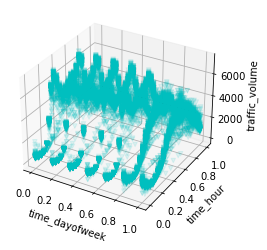

In [13]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

dfa=np.array(df)
fig = plt.figure().gca(projection='3d')
#ax = Axes3D(fig, azim=-115, elev=15)
print(dfa.shape)
Z = dfa[:,6]*np.ones((1,48194))
#fig.plot_wireframe(dfa[:,0], dfa[:,2], Z, color='black')
#fig.plot_trisurf(dfa[:,0], dfa[:,2], Z,  cmap='viridis', edgecolor='none')
fig.scatter(X_train[:,1], X_train[:,2], y_train ,c = "c" , marker = "v", alpha = 0.1 )




fig.set_xlabel("time_dayofweek")
fig.set_ylabel("time_hour")
fig.set_zlabel("traffic_volume")
fig.set_facecolor("White")

plt.show()
